In [2]:
#@title Medical_Appointment_No_Shows
import pandas as pd
import numpy as np
df=pd.read_csv("/content/medical_appointments_no_show_before.csv")
print(df.isnull().sum())



specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


/tmp/ipython-input-3018455170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


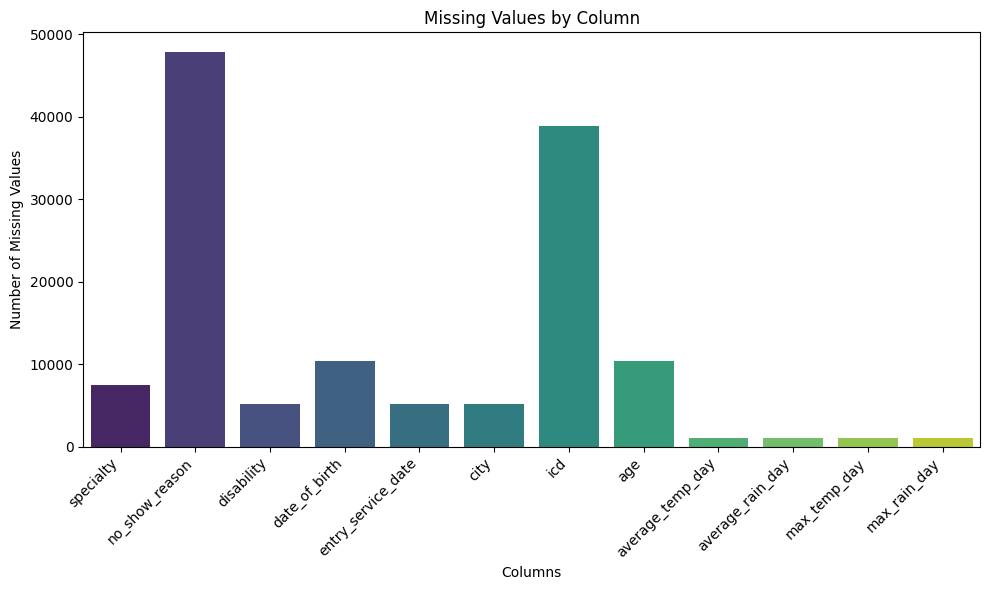

In [ ]:
#Visualizing missing data patterns using simple bar charts.

import matplotlib.pyplot as plt
import seaborn as sns

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0] # Filter out columns with no missing values

if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
    plt.title('Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

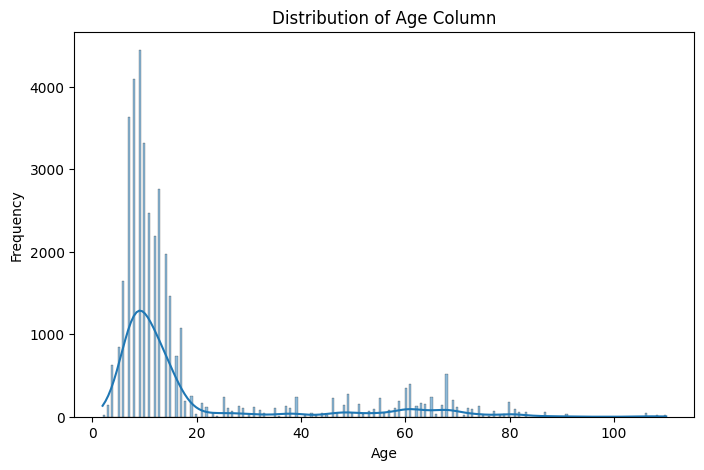

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'age' column
plt.figure(figsize=(8, 5))
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Distribution of Age Column')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Apply mean/median imputation for numerical columns

# Impute 'age' with the median
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# For demonstration, let's impute 'average_temp_day' with the mean

mean_avg_temp_day = df['average_temp_day'].mean()
df['average_temp_day'] = df['average_temp_day'].fillna(mean_avg_temp_day)

# You can extend this for other numerical columns as needed.
# For example, for 'disability', 'date_of_birth', 'entry_service_date', 'average_rain_day', 'max_temp_day', 'max_rain_day'

# Display the number of missing values after imputation for checked columns
print("Missing values after imputation for 'age' and 'average_temp_day':")
print(df[['age', 'average_temp_day']].isnull().sum())

Missing values after imputation for 'age' and 'average_temp_day':
age                 0
average_temp_day    0
dtype: int64


In [ ]:
# Applying mode imputation for categorical columns

categorical_columns = df.select_dtypes(include='object').columns
print(f"Categorical columns identified: {list(categorical_columns)}")

# Filter for categorical columns with missing values
missing_categorical_columns = [col for col in categorical_columns if df[col].isnull().any()]

print(f"Categorical columns with missing values: {missing_categorical_columns}")

# Apply mode imputation to each identified column
for col in missing_categorical_columns:
    mode_value = df[col].mode()[0] # .mode() can return multiple values, take the first one
    df[col] = df[col].fillna(mode_value)
    print(f"Imputed missing values in '{col}' with mode: {mode_value}")

# Display the number of missing values after imputation for checked columns
print("\nMissing values after mode imputation for categorical columns:")
print(df[missing_categorical_columns].isnull().sum())

Categorical columns identified: ['specialty', 'appointment_time', 'gender', 'appointment_date', 'no_show', 'no_show_reason', 'disability', 'date_of_birth', 'entry_service_date', 'city', 'icd', 'appointment_month', 'appointment_shift', 'rain_intensity', 'heat_intensity']
Categorical columns with missing values: ['specialty', 'no_show_reason', 'disability', 'date_of_birth', 'entry_service_date', 'city', 'icd']
Imputed missing values in 'specialty' with mode: speech therapy
Imputed missing values in 'no_show_reason' with mode: doente
Imputed missing values in 'disability' with mode: intellectual
Imputed missing values in 'date_of_birth' with mode: 21/3/2017
Imputed missing values in 'entry_service_date' with mode: 6/3/2017
Imputed missing values in 'city' with mode: ITAJAÍ
Imputed missing values in 'icd' with mode: F84

Missing values after mode imputation for categorical columns:
specialty             0
no_show_reason        0
disability            0
date_of_birth         0
entry_service

In [ ]:
# Remove columns with extremely high missing values

missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

if not missing_values_after_imputation.empty:
    print("Remaining missing values by column after previous steps:")
    print(missing_values_after_imputation)

    # Calculate percentage of missing values
    missing_percentage = (missing_values_after_imputation / len(df)) * 100
    print("\nPercentage of remaining missing values:")
    print(missing_percentage)

    # Define a threshold for 'extremely high' missing values (e.g., 50%)
    threshold = 50
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

    if columns_to_drop:
        print(f"\nColumns to drop (missing > {threshold}%): {columns_to_drop}")
        df.drop(columns=columns_to_drop, inplace=True)
        print(f"Dropped columns: {columns_to_drop}")
        print("\nDataFrame shape after dropping columns:", df.shape)
    else:
        print(f"\nNo columns found with more than {threshold}% missing values.")
else:
    print("No missing values remaining in the DataFrame.")

Remaining missing values by column after previous steps:
average_rain_day    1016
max_temp_day        1016
max_rain_day        1016
dtype: int64

Percentage of remaining missing values:
average_rain_day    2.048676
max_temp_day        2.048676
max_rain_day        2.048676
dtype: float64

No columns found with more than 50% missing values.


In [3]:
# Removing columns with extremely high missing values

print("Total missing values after all cleaning steps:")
print(df.isnull().sum())

Total missing values after all cleaning steps:
specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


In [4]:
# Validating dataset after cleaning.

df = pd.read_csv("/content/medical_appointments_no_show_before.csv")

# Impute 'age' with the median (from cell ae7f4dd0)
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# Impute 'average_temp_day' with the mean (from cell ae7f4dd0)
mean_avg_temp_day = df['average_temp_day'].mean()
df['average_temp_day'] = df['average_temp_day'].fillna(mean_avg_temp_day)

# Apply mode imputation for categorical columns (from cell 8a66dfcd)
categorical_columns = df.select_dtypes(include='object').columns
missing_categorical_columns = [col for col in categorical_columns if df[col].isnull().any()]
for col in missing_categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Apply logic for dropping columns if missing > 50% (from cell 04218744)
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
missing_percentage = (missing_values_after_imputation / len(df)) * 100
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)

# Calculate and display remaining missing values
print("Total missing values after all cleaning steps:")
print(df.isnull().sum())

Total missing values after all cleaning steps:
specialty                     0
appointment_time              0
gender                        0
appointment_date              0
no_show                       0
no_show_reason                0
disability                    0
date_of_birth                 0
entry_service_date            0
city                          0
icd                           0
appointment_month             0
appointment_year              0
appointment_shift             0
age                           0
under_12_years_old            0
over_60_years_old             0
patient_needs_companion       0
average_temp_day              0
average_rain_day           1016
max_temp_day               1016
max_rain_day               1016
rainy_day_before              0
storm_day_before              0
rain_intensity                0
heat_intensity                0
dtype: int64


In [5]:
missing_values_count = df.isnull().sum()
remaining_missing_values = missing_values_count[missing_values_count > 0]

print("Columns with remaining missing values:")
print(remaining_missing_values)

Columns with remaining missing values:
average_rain_day    1016
max_temp_day        1016
max_rain_day        1016
dtype: int64


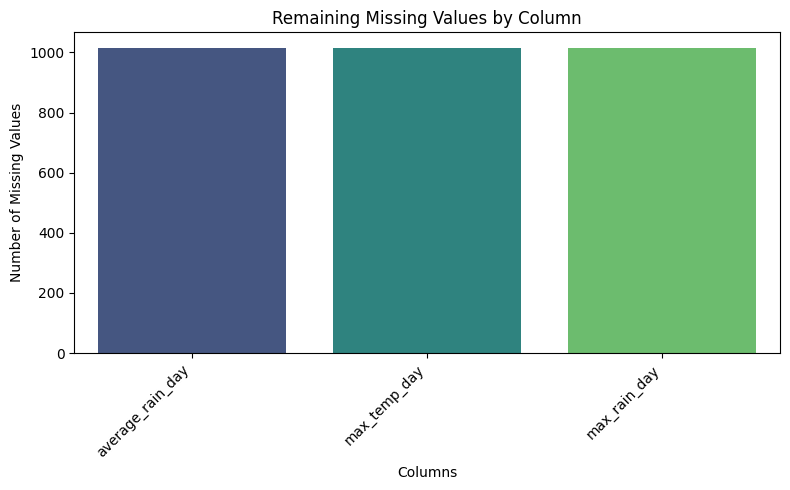

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=remaining_missing_values.index, y=remaining_missing_values.values, hue=remaining_missing_values.index, palette='viridis', legend=False)
plt.title('Remaining Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Compare before vs after dataset size and quality.
df_original = pd.read_csv('/content/medical_appointments_no_show_before.csv')
print("Shape of the original DataFrame (rows, columns):")
print(df_original.shape)

total_missing_original = df_original.isnull().sum().sum()
print("\nTotal missing values in the original DataFrame:")
print(total_missing_original)

Shape of the original DataFrame (rows, columns):
(49593, 26)

Total missing values in the original DataFrame:
134394


In [10]:
print("--- Comparison of Original vs. Cleaned DataFrame ---")
print("Original DataFrame Shape:", df_original.shape)
print("Original DataFrame Total Missing Values:", total_missing_original)

print("\nCleaned DataFrame Shape:", df.shape)
print("Cleaned DataFrame Total Missing Values:", total_missing_cleaned)

--- Comparison of Original vs. Cleaned DataFrame ---
Original DataFrame Shape: (49593, 26)
Original DataFrame Total Missing Values: 134394

Cleaned DataFrame Shape: (49593, 26)
Cleaned DataFrame Total Missing Values: 3048


In [11]:
# Impute remaining numerical columns with their mean
df['average_rain_day'] = df['average_rain_day'].fillna(df['average_rain_day'].mean())
df['max_temp_day'] = df['max_temp_day'].fillna(df['max_temp_day'].mean())
df['max_rain_day'] = df['max_rain_day'].fillna(df['max_rain_day'].mean())

print("Missing values after final imputation:")
print(df.isnull().sum())


Missing values after final imputation:
specialty                  0
appointment_time           0
gender                     0
appointment_date           0
no_show                    0
no_show_reason             0
disability                 0
date_of_birth              0
entry_service_date         0
city                       0
icd                        0
appointment_month          0
appointment_year           0
appointment_shift          0
age                        0
under_12_years_old         0
over_60_years_old          0
patient_needs_companion    0
average_temp_day           0
average_rain_day           0
max_temp_day               0
max_rain_day               0
rainy_day_before           0
storm_day_before           0
rain_intensity             0
heat_intensity             0
dtype: int64


In [12]:
output_file_path = "medical_appointments_no_show_fully_cleaned.csv"
df.to_csv(output_file_path, index=False)
print(f"Fully cleaned dataset saved to: {output_file_path}")

Fully cleaned dataset saved to: medical_appointments_no_show_fully_cleaned.csv


In [14]:
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>